In [1]:
from Regression import Regression
            
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
import scipy.stats
import time
from imageio import imread
from tqdm import tqdm, trange

mpl.style.use("seaborn-darkgrid")
mpl.rcParams["image.cmap"] = "gnuplot2"
mpl.rcParams['figure.figsize'] = [6.0, 6.0]
mpl.rcParams["font.size"] = 14

np.random.seed(1942)

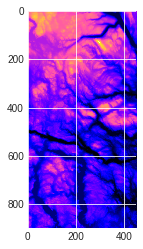

In [2]:
terrain1 = imread("../input_data/SRTM_data_Norway_1.tif")[::4, ::4]
plt.imshow(terrain1);

In [3]:
reg = Regression()
reg.load_matrix_data(terrain1)

In [4]:
data_pred = reg.solveKFold(K=10, poly_order=10, solver="Ridge", lamda=1e-4)

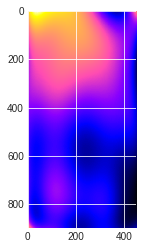

In [8]:
plt.imshow(data_pred);

In [ ]:
err_list = []
poly_orders = 2**np.linspace(0, 7, 8)
nr_poly_orders = len(poly_orders)

fig, ax = plt.subplots((nr_poly_orders+3)//4, 4, figsize=(16, 4*((nr_poly_orders+3)//4)))

for i in trange(len(poly_orders)):
    poly_order = int(poly_orders[i])
    print(poly_order)
    #beta = reg.solveCoefficients(poly_order=poly_order, solver="OLS")
    #data_pred = reg.apply_model(beta, reg.x_mesh, reg.y_mesh)
    data_pred = reg.solveKFold(poly_order=poly_order, K=5, solver="OLS_unsafe")
    ax[i//4, i%4].imshow(data_pred)
    ax[i//4, i%4].set_title(MSE(data_pred, reg.f))
    err_list.append(MSE(reg.f, data_pred))

In [ ]:
plt.loglog(poly_orders, err_list)

In [ ]:
t